In [33]:
#%% import pakages
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pickle
from sklearn.linear_model import LinearRegression

In [34]:
#  set parameters

# import function
function_dir_ = 'C:/Users/daizh/manuscript_shear_structure_formation_different_conditions/python_file'
os.chdir(function_dir_)
from import_data import *

#  work path
wd_ = 'D:/sheared_granular_gouge_different_evironment_condition'
#%% change current directory
os.chdir(wd_)

# set data path
path_FrictionState_ = 'particle_info/particle_info_friction_state.txt'
path_ParticleInfo_ = 'particle_info/particle_info_%d.txt' # note this path need to replace the number
path_HistoryData_ = 'particle_info/history_data.his'

path_NormalStress_ = ['1MPa', '10MPa', '20MPa', '30MPa', '40MPa']
path_ShearVelocity_ = ['p01mps', 'p05mps', 'p1mps', 'p5mps', '1mps']
path_LoadStiffness_ = ['1k', '2k', '4k', '20k', '80k']

path_Conditions_ = ['normal_stress', 'shear_velocity', 'k']

In [35]:
# read FrictionState and HistoryData (normal stress)
# table head: 0. Load pointer displacement, 1. Friction, 2. Top plate displacement, 
# 3. Bottom plate displacement, 4. Top plate velocity, 5. Bottom plate velocity
FrictionState_1MPa_ = read_FrictionState(os.path.join(path_Conditions_[0], path_NormalStress_[0], path_FrictionState_))
FrictionState_10MPa_ = read_FrictionState(os.path.join(path_Conditions_[0], path_NormalStress_[1], path_FrictionState_))
FrictionState_20MPa_ = read_FrictionState(os.path.join(path_Conditions_[0], path_NormalStress_[2], path_FrictionState_))
FrictionState_30MPa_ = read_FrictionState(os.path.join(path_Conditions_[0], path_NormalStress_[3], path_FrictionState_))
FrictionState_40MPa_ = read_FrictionState(os.path.join(path_Conditions_[0], path_NormalStress_[4], path_FrictionState_))

# table head: 0. step, 1. displacement, 2. gouge_thickness, 3. shear_strain,
# 4. shear_stress, 5. normal_stress, 6. friction,  7. plate_displacement,
# 8. plate_velocity, 9. plate_displacement_bottom, 10. plate_velocity_bottom,
# 11. shear_strain_rate
HistoryData_1MPa_ = read_HistoryData(os.path.join(path_Conditions_[0], path_NormalStress_[0], path_HistoryData_))
HistoryData_10MPa_ = read_HistoryData(os.path.join(path_Conditions_[0], path_NormalStress_[1], path_HistoryData_))
HistoryData_20MPa_ = read_HistoryData(os.path.join(path_Conditions_[0], path_NormalStress_[2], path_HistoryData_))
HistoryData_30MPa_ = read_HistoryData(os.path.join(path_Conditions_[0], path_NormalStress_[3], path_HistoryData_))
HistoryData_40MPa_ = read_HistoryData(os.path.join(path_Conditions_[0], path_NormalStress_[4], path_HistoryData_))

# read FrictionState and HistoryData (shear velocity)
# table head: 0. Load pointer displacement, 1. Friction, 2. Top plate displacement, 
# 3. Bottom plate displacement, 4. Top plate velocity, 5. Bottom plate velocity
FrictionState_p01mps_ = read_FrictionState(os.path.join(path_Conditions_[1], path_ShearVelocity_[0], path_FrictionState_))
FrictionState_p05mps_ = read_FrictionState(os.path.join(path_Conditions_[1], path_ShearVelocity_[1], path_FrictionState_))
FrictionState_p1mps_ = read_FrictionState(os.path.join(path_Conditions_[1], path_ShearVelocity_[2], path_FrictionState_))
FrictionState_p5mps_ = read_FrictionState(os.path.join(path_Conditions_[1], path_ShearVelocity_[3], path_FrictionState_))
FrictionState_1mps_ = read_FrictionState(os.path.join(path_Conditions_[1], path_ShearVelocity_[4], path_FrictionState_))

# table head: 0. step, 1. displacement, 2. gouge_thickness, 3. shear_strain,
# 4. shear_stress, 5. normal_stress, 6. friction,  7. plate_displacement,
# 8. plate_velocity, 9. plate_displacement_bottom, 10. plate_velocity_bottom,
# 11. shear_strain_rate
HistoryData_p01mps_ = read_HistoryData(os.path.join(path_Conditions_[1], path_ShearVelocity_[0], path_HistoryData_))
HistoryData_p05mps_ = read_HistoryData(os.path.join(path_Conditions_[1], path_ShearVelocity_[1], path_HistoryData_))
HistoryData_p1mps_ = read_HistoryData(os.path.join(path_Conditions_[1], path_ShearVelocity_[2], path_HistoryData_))
HistoryData_p5mps_ = read_HistoryData(os.path.join(path_Conditions_[1], path_ShearVelocity_[3], path_HistoryData_))
HistoryData_1mps_ = read_HistoryData(os.path.join(path_Conditions_[1], path_ShearVelocity_[4], path_HistoryData_))

# read FrictionState and HistoryData (load stiffness)
# table head: 0. Load pointer displacement, 1. Friction, 2. Top plate displacement, 
# 3. Bottom plate displacement, 4. Top plate velocity, 5. Bottom plate velocity
FrictionState_1k_ = read_FrictionState(os.path.join(path_Conditions_[2], path_LoadStiffness_[0], path_FrictionState_))
FrictionState_2k_ = read_FrictionState(os.path.join(path_Conditions_[2], path_LoadStiffness_[1], path_FrictionState_))
FrictionState_4k_ = read_FrictionState(os.path.join(path_Conditions_[2], path_LoadStiffness_[2], path_FrictionState_))
FrictionState_20k_ = read_FrictionState(os.path.join(path_Conditions_[2], path_LoadStiffness_[3], path_FrictionState_))
FrictionState_80k_ = read_FrictionState(os.path.join(path_Conditions_[2], path_LoadStiffness_[4], path_FrictionState_))

# table head: 0. step, 1. displacement, 2. gouge_thickness, 3. shear_strain,
# 4. shear_stress, 5. normal_stress, 6. friction,  7. plate_displacement,
# 8. plate_velocity, 9. plate_displacement_bottom, 10. plate_velocity_bottom,
# 11. shear_strain_rate
HistoryData_1k_ = read_HistoryData(os.path.join(path_Conditions_[2], path_LoadStiffness_[0], path_HistoryData_))
HistoryData_2k_ = read_HistoryData(os.path.join(path_Conditions_[2], path_LoadStiffness_[1], path_HistoryData_))
HistoryData_4k_ = read_HistoryData(os.path.join(path_Conditions_[2], path_LoadStiffness_[2], path_HistoryData_))
HistoryData_20k_ = read_HistoryData(os.path.join(path_Conditions_[2], path_LoadStiffness_[3], path_HistoryData_))
HistoryData_80k_ = read_HistoryData(os.path.join(path_Conditions_[2], path_LoadStiffness_[4], path_HistoryData_))

t_ = HistoryData_80k_[:,4]
t_index_ = []
for i_ in np.where(t_ < 0)[0]:
    t_index_.append(np.arange(i_ - 100, i_ + 100))
t_index_ = np.array(t_index_)    
t_index_ = np.ravel(t_index_)
t_index_ = np.unique(t_index_)
t_index_ = np.delete(t_index_, np.where(t_index_ > HistoryData_80k_.shape[0] - 1))
HistoryData_80k_ = np.delete(HistoryData_80k_, t_index_, axis = 0)


Reading friction state...

Index(['Load pointer displacement', ' Friction', ' Top plate displacement',
       ' Bottom plate displacement', ' Top plate velocity',
       ' Bottom plate velocity'],
      dtype='object')

Read friction state successful


Reading friction state...

Index(['Load pointer displacement', ' Friction', ' Top plate displacement',
       ' Bottom plate displacement', ' Top plate velocity',
       ' Bottom plate velocity'],
      dtype='object')

Read friction state successful


Reading friction state...

Index(['Load pointer displacement', ' Friction', ' Top plate displacement',
       ' Bottom plate displacement', ' Top plate velocity',
       ' Bottom plate velocity'],
      dtype='object')

Read friction state successful


Reading friction state...

Index(['Load pointer displacement', ' Friction', ' Top plate displacement',
       ' Bottom plate displacement', ' Top plate velocity',
       ' Bottom plate velocity'],
      dtype='object')

Read friction state 

In [36]:
# read in events data

# read 1MPa
filename_ = open('python_event_data/events_1MPa_.pkl', 'rb')
events_1MPa_ = pickle.load(filename_)
print('Read events_1MPa_ done')
filename_.close()

# read 10MPa
filename_ = open('python_event_data/events_10MPa_.pkl', 'rb')
events_10MPa_ = pickle.load(filename_)
print('Read events_10MPa_ done')
filename_.close()

# read 20MPa
filename_ = open('python_event_data/events_20MPa_.pkl', 'rb')
events_20MPa_ = pickle.load(filename_)
print('Read events_20MPa_ done')
filename_.close()

# read 30MPa
filename_ = open('python_event_data/events_30MPa_.pkl', 'rb')
events_30MPa_ = pickle.load(filename_)
print('Read events_30MPa_ done')
filename_.close()

# read 40MPa
filename_ = open('python_event_data/events_40MPa_.pkl', 'rb')
events_40MPa_ = pickle.load(filename_)
print('Read events_40MPa_ done')
filename_.close()

# read p01mps
filename_ = open('python_event_data/events_p01mps_.pkl', 'rb')
events_p01mps_ = pickle.load(filename_)
print('Read events_p01mps_ done')
filename_.close()

# read p05mps
filename_ = open('python_event_data/events_p05mps_.pkl', 'rb')
events_p05mps_ = pickle.load(filename_)
print('Read events_p05mps_ done')
filename_.close()

# read p5mps
filename_ = open('python_event_data/events_p5mps_.pkl', 'rb')
events_p5mps_ = pickle.load(filename_)
print('Read events_p5mps_ done')
filename_.close()

# read 1mps
filename_ = open('python_event_data/events_1mps_.pkl', 'rb')
events_1mps_ = pickle.load(filename_)
print('Read events_1mps_ done')
filename_.close()

# read 2k
filename_ = open('python_event_data/events_2k_.pkl', 'rb')
events_2k_ = pickle.load(filename_)
print('Read events_2k_ done')
filename_.close()


# read 4k
filename_ = open('python_event_data/events_4k_.pkl', 'rb')
events_4k_ = pickle.load(filename_)
print('Read events_4k_ done')
filename_.close()


# read 20k
filename_ = open('python_event_data/events_20k_.pkl', 'rb')
events_20k_ = pickle.load(filename_)
print('Read events_20k_ done')
filename_.close()


# read 80k
filename_ = open('python_event_data/events_80k_.pkl', 'rb')
events_80k_ = pickle.load(filename_)
print('Read events_80k_ done')
filename_.close()

Read events_1MPa_ done
Read events_10MPa_ done
Read events_20MPa_ done
Read events_30MPa_ done
Read events_40MPa_ done
Read events_p01mps_ done
Read events_p05mps_ done
Read events_p5mps_ done
Read events_1mps_ done
Read events_2k_ done
Read events_4k_ done
Read events_20k_ done
Read events_80k_ done


In [37]:
# extract the property of events
# 1MPa ################################################################
normal_stress_ = 1
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_1MPa_[:, 4]) / (HistoryData_1MPa_[np.argmax(HistoryData_1MPa_[:, 4]), 1] / 0.002)

stress_drop_1MPa_ = []
friction_drop_1MPa_ = []
slip_velocity_1MPa_ = []
duration_1MPa_ = []
displacement_1MPa_ = []
peak_shear_stress_1MPa_ = []
seismi_moment_1MPa_ = []
for start_end_ in events_1MPa_:
    T_ = HistoryData_1MPa_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_1MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_1MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_1MPa_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_1MPa_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_1MPa_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_1MPa_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_1MPa_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 1MPa done')

# 10MPa ################################################################
normal_stress_ = 10
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_10MPa_[:, 4]) / (HistoryData_10MPa_[np.argmax(HistoryData_10MPa_[:, 4]), 1] / 0.002)

stress_drop_10MPa_ = []
friction_drop_10MPa_ = []
slip_velocity_10MPa_ = []
duration_10MPa_ = []
displacement_10MPa_ = []
peak_shear_stress_10MPa_ = []
seismi_moment_10MPa_ = []
for start_end_ in events_10MPa_:
    T_ = HistoryData_10MPa_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_10MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_10MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_10MPa_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_10MPa_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_10MPa_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_10MPa_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_10MPa_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 10MPa done')

# 20MPa ################################################################
normal_stress_ = 20
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_20MPa_[:, 4]) / (HistoryData_20MPa_[np.argmax(HistoryData_20MPa_[:, 4]), 1] / 0.002)

stress_drop_20MPa_ = []
friction_drop_20MPa_ = []
slip_velocity_20MPa_ = []
duration_20MPa_ = []
displacement_20MPa_ = []
peak_shear_stress_20MPa_ = []
seismi_moment_20MPa_ = []
for start_end_ in events_20MPa_:
    T_ = HistoryData_20MPa_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_20MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_20MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_20MPa_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_20MPa_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_20MPa_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_20MPa_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_20MPa_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 20MPa done')

# 30MPa ################################################################
normal_stress_ = 30
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_30MPa_[:, 4]) / (HistoryData_30MPa_[np.argmax(HistoryData_30MPa_[:, 4]), 1] / 0.002)

stress_drop_30MPa_ = []
friction_drop_30MPa_ = []
slip_velocity_30MPa_ = []
duration_30MPa_ = []
displacement_30MPa_ = []
peak_shear_stress_30MPa_ = []
seismi_moment_30MPa_ = []
for start_end_ in events_30MPa_:
    T_ = HistoryData_30MPa_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_30MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_30MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_30MPa_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_30MPa_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_30MPa_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_30MPa_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_30MPa_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 30MPa done')

# 40MPa ################################################################
normal_stress_ = 40
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_40MPa_[:, 4]) / (HistoryData_40MPa_[np.argmax(HistoryData_40MPa_[:, 4]), 1] / 0.002)

stress_drop_40MPa_ = []
friction_drop_40MPa_ = []
slip_velocity_40MPa_ = []
duration_40MPa_ = []
displacement_40MPa_ = []
peak_shear_stress_40MPa_ = []
seismi_moment_40MPa_ = []
for start_end_ in events_40MPa_:
    T_ = HistoryData_40MPa_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_40MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_40MPa_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_40MPa_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_40MPa_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_40MPa_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_40MPa_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_40MPa_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 40MPa done')

# p01mps ################################################################
normal_stress_ = 20
shear_velocity_ = 0.01
ks_ = np.max(HistoryData_p01mps_[:, 4]) / (HistoryData_p01mps_[np.argmax(HistoryData_p01mps_[:, 4]), 1] / 0.002)

stress_drop_p01mps_ = []
friction_drop_p01mps_ = []
slip_velocity_p01mps_ = []
duration_p01mps_ = []
displacement_p01mps_ = []
peak_shear_stress_p01mps_ = []
seismi_moment_p01mps_ = []
for start_end_ in events_p01mps_:
    T_ = HistoryData_p01mps_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_p01mps_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_p01mps_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_p01mps_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_p01mps_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_p01mps_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_p01mps_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_p01mps_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of p01mps done')

# p05mps ################################################################
normal_stress_ = 20
shear_velocity_ = 0.05
ks_ = np.max(HistoryData_p05mps_[:, 4]) / (HistoryData_p05mps_[np.argmax(HistoryData_p05mps_[:, 4]), 1] / 0.002)

stress_drop_p05mps_ = []
friction_drop_p05mps_ = []
slip_velocity_p05mps_ = []
duration_p05mps_ = []
displacement_p05mps_ = []
peak_shear_stress_p05mps_ = []
seismi_moment_p05mps_ = []
for start_end_ in events_p05mps_:
    T_ = HistoryData_p05mps_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_p05mps_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_p05mps_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_p05mps_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_p05mps_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_p05mps_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_p05mps_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_p05mps_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of p05mps done')



# p5mps ################################################################
normal_stress_ = 20
shear_velocity_ = 0.5
ks_ = np.max(HistoryData_p5mps_[:, 4]) / (HistoryData_p5mps_[np.argmax(HistoryData_p5mps_[:, 4]), 1] / 0.002)

stress_drop_p5mps_ = []
friction_drop_p5mps_ = []
slip_velocity_p5mps_ = []
duration_p5mps_ = []
displacement_p5mps_ = []
peak_shear_stress_p5mps_ = []
seismi_moment_p5mps_ = []
for start_end_ in events_p5mps_:
    T_ = HistoryData_p5mps_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_p5mps_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_p5mps_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_p5mps_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_p5mps_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_p5mps_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_p5mps_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_p5mps_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of p5mps done')

# 1mps ################################################################
normal_stress_ = 20
shear_velocity_ = 1
ks_ = np.max(HistoryData_1mps_[:, 4]) / (HistoryData_1mps_[np.argmax(HistoryData_1mps_[:, 4]), 1] / 0.002)

stress_drop_1mps_ = []
friction_drop_1mps_ = []
slip_velocity_1mps_ = []
duration_1mps_ = []
displacement_1mps_ = []
peak_shear_stress_1mps_ = []
seismi_moment_1mps_ = []
for start_end_ in events_1mps_:
    T_ = HistoryData_1mps_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_1mps_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_1mps_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_1mps_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_1mps_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_1mps_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_1mps_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_1mps_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 1mps done')

# 2k ################################################################
normal_stress_ = 20
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_2k_[:, 4]) / (HistoryData_2k_[np.argmax(HistoryData_2k_[:, 4]), 1] / 0.002)

stress_drop_2k_ = []
friction_drop_2k_ = []
slip_velocity_2k_ = []
duration_2k_ = []
displacement_2k_ = []
peak_shear_stress_2k_ = []
seismi_moment_2k_ = []
for start_end_ in events_2k_:
    T_ = HistoryData_2k_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_2k_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_2k_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_2k_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_2k_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_2k_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_2k_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_2k_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 2k done')

# 4k ################################################################
normal_stress_ = 20
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_4k_[:, 4]) / (HistoryData_4k_[np.argmax(HistoryData_4k_[:, 4]), 1] / 0.002)

stress_drop_4k_ = []
friction_drop_4k_ = []
slip_velocity_4k_ = []
duration_4k_ = []
displacement_4k_ = []
peak_shear_stress_4k_ = []
seismi_moment_4k_ = []
for start_end_ in events_4k_:
    T_ = HistoryData_4k_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_4k_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_4k_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_4k_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_4k_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_4k_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_4k_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_4k_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 4k done')

# 20k ################################################################
normal_stress_ = 20
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_20k_[:, 4]) / (HistoryData_20k_[np.argmax(HistoryData_20k_[:, 4]), 1] / 0.002)

stress_drop_20k_ = []
friction_drop_20k_ = []
slip_velocity_20k_ = []
duration_20k_ = []
displacement_20k_ = []
peak_shear_stress_20k_ = []
seismi_moment_20k_ = []
for start_end_ in events_20k_:
    T_ = HistoryData_20k_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_20k_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_20k_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_20k_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_20k_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_20k_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_20k_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_20k_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 20k done')

# 80k ################################################################
normal_stress_ = 20
shear_velocity_ = 0.1
ks_ = np.max(HistoryData_80k_[:, 4]) / (HistoryData_80k_[np.argmax(HistoryData_80k_[:, 4]), 1] / 0.002)

stress_drop_80k_ = []
friction_drop_80k_ = []
slip_velocity_80k_ = []
duration_80k_ = []
displacement_80k_ = []
peak_shear_stress_80k_ = []
seismi_moment_80k_ = []
for start_end_ in events_80k_:
    T_ = HistoryData_80k_[start_end_[0][0]:start_end_[1][0]+1, :].copy()
    stress_drop_80k_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6)
    friction_drop_80k_.append((np.max(T_[:, 4])- np.min(T_[:, 4])) / 10**6 / normal_stress_)
    slip_velocity_80k_.append(np.max(np.abs((T_[:, 8] - T_[:, 10]) / 2)))
    duration_80k_.append((T_[-1, 1] - T_[0, 1] ) / shear_velocity_ * 1000)
    displacement_80k_.append((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9]))
    peak_shear_stress_80k_.append(np.max(T_[:, 4]) / 10**6)
    seismi_moment_80k_.append(ks_ * ((T_[-1, 7] - T_[0, 7]) - (T_[-1, 9] - T_[0, 9])) * 0.004)
print('Calculation of 80k done')

Calculation of 1MPa done
Calculation of 10MPa done
Calculation of 20MPa done
Calculation of 30MPa done
Calculation of 40MPa done
Calculation of p01mps done
Calculation of p05mps done
Calculation of p5mps done
Calculation of 1mps done
Calculation of 2k done
Calculation of 4k done
Calculation of 20k done
Calculation of 80k done


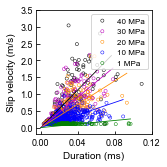

In [38]:
# plot the slip velocity and duration
# friction overall (different load stiffness)
plt.figure(figsize=(2.4,2.4))
plt.rcParams['font.size'] = 9
plt.rc('font', family = 'Arial')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.scatter(duration_40MPa_, slip_velocity_40MPa_, c = 'none', edgecolor = 'k', linewidth = 0.5, s = 10, label = '40 MPa')
plt.scatter(duration_30MPa_, slip_velocity_30MPa_, c = 'none', edgecolor = 'm', linewidth = 0.5, s = 10, label = '30 MPa')
plt.scatter(duration_20MPa_, slip_velocity_20MPa_, c = 'none', edgecolor = 'darkorange', linewidth = 0.5, s = 10, label = '20 MPa')
plt.scatter(duration_10MPa_, slip_velocity_10MPa_, c = 'none', edgecolor = 'b', linewidth = 0.5, s = 10, label = '10 MPa')
plt.scatter(duration_1MPa_, slip_velocity_1MPa_, c = 'none', edgecolor = 'g', linewidth = 0.5, s = 10, label = '1 MPa')




t_ = np.array(duration_40MPa_) 
v_ = np.array(slip_velocity_40MPa_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max()*0.7, num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'k', )

t_ = np.array(duration_30MPa_) 
v_ = np.array(slip_velocity_30MPa_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max(), num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'm', )

t_ = np.array(duration_20MPa_) 
v_ = np.array(slip_velocity_20MPa_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max(), num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'darkorange', )

t_ = np.array(duration_10MPa_) 
v_ = np.array(slip_velocity_10MPa_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max(), num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'b', )

t_ = np.array(duration_1MPa_) 
v_ = np.array(slip_velocity_1MPa_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max(), num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'g', )

# plt.xlabel('Displacement (mm)', fontsize = 10)
# plt.ylabel('Shear stress (MPa)', fontsize = 10)
plt.xlim([-0.005, 0.12])
plt.ylim([-0.2, 3.5])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
plt.xticks([0, 0.04, 0.08, 0.12])
plt.legend( fontsize = 8)
plt.xlabel('Duration (ms)', fontsize = 10)
plt.ylabel('Slip velocity (m/s)', fontsize = 10)
plt.tight_layout()
plt.savefig('C:/Users/daizh/manuscript_shear_structure_formation_different_conditions/python_file/notebook_plot/property_of_slip_events_normal_stress.svg', dpi=600, format='svg')

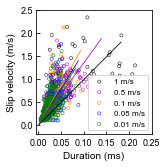

In [39]:
# plot the slip velocity and duration
# friction overall (different load stiffness)
plt.figure(figsize=(2.4,2.4))
plt.rcParams['font.size'] = 9
plt.rc('font', family = 'Arial')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'



plt.scatter(duration_1mps_, slip_velocity_1mps_, c = 'none', edgecolor = 'k', linewidth = 0.5, s = 10, label = '1 m/s')
plt.scatter(duration_p5mps_, slip_velocity_p5mps_, c = 'none', edgecolor = 'm', linewidth = 0.5, s = 10, label = '0.5 m/s')
plt.scatter(duration_20MPa_, slip_velocity_20MPa_, c = 'none', edgecolor = 'darkorange', linewidth = 0.5, s = 10, label = '0.1 m/s')
plt.scatter(duration_p05mps_, slip_velocity_p05mps_, c = 'none', edgecolor = 'b', linewidth = 0.5, s = 10, label = '0.05 m/s')
plt.scatter(duration_p01mps_, slip_velocity_p01mps_, c = 'none', edgecolor = 'g', linewidth = 0.5, s = 10, label = '0.01 m/s')



t_ = np.array(duration_1mps_) 
v_ = np.array(slip_velocity_1mps_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max()*0.7, num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'k', )

t_ = np.array(duration_p5mps_) 
v_ = np.array(slip_velocity_p5mps_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max(), num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'm', )

t_ = np.array(duration_20MPa_) 
v_ = np.array(slip_velocity_20MPa_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max(), num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'darkorange', )

t_ = np.array(duration_p05mps_) 
v_ = np.array(slip_velocity_p05mps_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max(), num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'b', )

t_ = np.array(duration_p01mps_) 
v_ = np.array(slip_velocity_p01mps_) 
t_ = t_.reshape(-1, 1)
v_ = v_.reshape(-1, 1)
linear_model_ = LinearRegression(fit_intercept=False)
linear_model_.fit(t_, v_)
x_predict_ = np.linspace(0, t_.max(), num = 10)
x_predict_ = x_predict_.reshape(-1, 1)
y_predict_ = linear_model_.predict(x_predict_)
plt.plot(x_predict_, y_predict_, linewidth = 0.8, color = 'g', )

# plt.xlabel('Displacement (mm)', fontsize = 10)
# plt.ylabel('Shear stress (MPa)', fontsize = 10)
plt.xlim([-0.005, 0.25])
plt.ylim([-0.2, 2.5])
# plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.legend( fontsize = 8)
plt.xlabel('Duration (ms)', fontsize = 10)
plt.ylabel('Slip velocity (m/s)', fontsize = 10)
plt.tight_layout()
plt.savefig('C:/Users/daizh/manuscript_shear_structure_formation_different_conditions/python_file/notebook_plot/property_of_slip_events_shear_velocity.svg', dpi=600, format='svg')

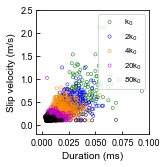

In [40]:
# plot the slip velocity and duration
# friction overall (different load stiffness)
plt.figure(figsize=(2.4,2.4))
plt.rcParams['font.size'] = 9
plt.rc('font', family = 'Arial')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.scatter(duration_20MPa_, slip_velocity_20MPa_, c = 'none', edgecolor = 'g', linewidth = 0.5, s = 10, label = 'k$_{0}$')
plt.scatter(duration_2k_, slip_velocity_2k_, c = 'none', edgecolor = 'b', linewidth = 0.5, s = 10, label = '2k$_{0}$')
plt.scatter(duration_4k_, slip_velocity_4k_, c = 'none', edgecolor = 'darkorange', linewidth = 0.5, s = 10, label = '4k$_{0}$')
plt.scatter(duration_20k_, slip_velocity_20k_, c = 'none', edgecolor = 'm', linewidth = 0.5, s = 10, label = '20k$_{0}$')
plt.scatter(duration_80k_, slip_velocity_80k_, c = 'none', edgecolor = 'k', linewidth = 0.5, s = 10, label = '80k$_{0}$')



# plt.xlabel('Displacement (mm)', fontsize = 10)
# plt.ylabel('Shear stress (MPa)', fontsize = 10)
plt.xlim([-0.005, 0.1])
plt.ylim([-0.2, 2.5])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5])
plt.xticks([0, 0.025, 0.05, 0.075, 0.1])
plt.legend( fontsize = 8)
plt.xlabel('Duration (ms)', fontsize = 10)
plt.ylabel('Slip velocity (m/s)', fontsize = 10)
plt.tight_layout()
plt.savefig('C:/Users/daizh/manuscript_shear_structure_formation_different_conditions/python_file/notebook_plot/property_of_slip_events_load_stiffness.svg', dpi=600, format='svg')

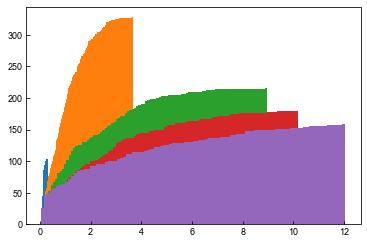

In [41]:
# plot the earthquake moment
# normal stress

# 1MPa
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_1MPa_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_1MPa_ = np.copy(centers_)
CCDF_1MPa_ = 1 - (n_  / len(seismi_moment_1MPa_))

# 10MPa
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_10MPa_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_10MPa_ = np.copy(centers_)
CCDF_10MPa_ = 1 - (n_  / len(seismi_moment_10MPa_))

# 20MPa
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_20MPa_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_20MPa_ = np.copy(centers_)
CCDF_20MPa_ = 1 - (n_  / len(seismi_moment_20MPa_))

# 30MPa
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_30MPa_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_30MPa_ = np.copy(centers_)
CCDF_30MPa_ = 1 - (n_  / len(seismi_moment_30MPa_))

# 40MPa
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_40MPa_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_40MPa_ = np.copy(centers_)
CCDF_40MPa_ = 1 - (n_  / len(seismi_moment_40MPa_))




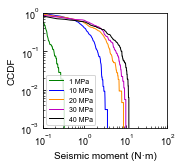

In [42]:
plt.figure(figsize=(2.6,2.4))
plt.rcParams['font.size'] = 9
plt.rc('font', family = 'Arial')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.axes(yscale = "log", xscale = "log",)

plt.plot(centers_1MPa_,  \
         CCDF_1MPa_,\
         linewidth = 1, color = 'g', label = '1 MPa')
plt.plot(centers_10MPa_,  \
         CCDF_10MPa_,\
         linewidth = 1, color = 'b', label = '10 MPa')
plt.plot(centers_20MPa_,  \
         CCDF_20MPa_,\
         linewidth = 1, color = 'darkorange', label = '20 MPa')
plt.plot(centers_30MPa_,  \
         CCDF_30MPa_,\
         linewidth = 1, color = 'm', label = '30 MPa')
plt.plot(centers_40MPa_,  \
         CCDF_40MPa_,\
         linewidth = 1, color = 'k', label = '40 MPa')

plt.legend( fontsize = 8)
plt.xlim(10**-1, 10**2)
plt.ylim([10**-3, 10**0])
# plt.ylim([-0.2, 2.5])
# plt.yticks([0, 0.5, 1, 1.5, 2, 2.5])
# plt.xticks([0, 0.025, 0.05, 0.075, 0.1])
plt.legend( fontsize = 7)
plt.xlabel('Seismic moment (N·m)', fontsize = 10)
plt.ylabel('CCDF', fontsize = 10)
plt.tight_layout()
plt.savefig('C:/Users/daizh/manuscript_shear_structure_formation_different_conditions/python_file/notebook_plot/statistics_of_seismic_moment_normal_stress.svg', dpi=600, format='svg')

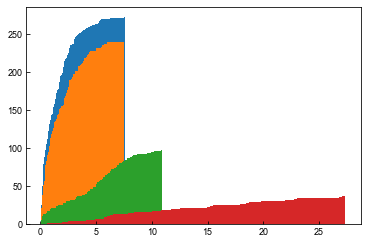

In [43]:
# plot the earthquake moment
# shear velocity

# p01mps
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_p01mps_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_p01mps_ = np.copy(centers_)
CCDF_p01mps_ = 1 - (n_  / len(seismi_moment_p01mps_))

# p05mps
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_p05mps_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_p05mps_ = np.copy(centers_)
CCDF_p05mps_ = 1 - (n_  / len(seismi_moment_p05mps_))


# p5mps
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_p5mps_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_p5mps_ = np.copy(centers_)
CCDF_p5mps_ = 1 - (n_  / len(seismi_moment_p5mps_))

# 1mps
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_1mps_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_1mps_ = np.copy(centers_)
CCDF_1mps_ = 1 - (n_  / len(seismi_moment_1mps_))


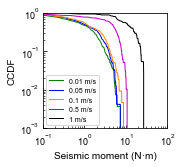

In [44]:
# plot the earthquake moment
# slip velocity
plt.figure(figsize=(2.6,2.4))
plt.rcParams['font.size'] = 9
plt.rc('font', family = 'Arial')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.axes(yscale = "log", xscale = "log",)

plt.plot(centers_p01mps_,  \
         CCDF_p01mps_,\
         linewidth = 1, color = 'g', label = '0.01 m/s')
plt.plot(centers_p05mps_,  \
         CCDF_p05mps_,\
         linewidth = 1, color = 'b', label = '0.05 m/s')
plt.plot(centers_20MPa_,  \
         CCDF_20MPa_,\
         linewidth = 1, color = 'darkorange', label = '0.1 m/s')
plt.plot(centers_p5mps_,  \
         CCDF_p5mps_,\
         linewidth = 1, color = 'm', label = '0.5 m/s')
plt.plot(centers_1mps_,  \
         CCDF_1mps_,\
         linewidth = 1, color = 'k', label = '1 m/s')

plt.legend( fontsize = 8)
plt.xlim(10**-1, 10**2)
plt.ylim([10**-3, 10**0])
# plt.ylim([-0.2, 2.5])
# plt.yticks([0, 0.5, 1, 1.5, 2, 2.5])
# plt.xticks([0, 0.025, 0.05, 0.075, 0.1])
plt.legend( fontsize = 7)
plt.xlabel('Seismic moment (N·m)', fontsize = 10)
plt.ylabel('CCDF', fontsize = 10)
plt.tight_layout()
plt.savefig('C:/Users/daizh/manuscript_shear_structure_formation_different_conditions/python_file/notebook_plot/statistics_of_seismic_moment_shear_velocity.svg', dpi=600, format='svg')

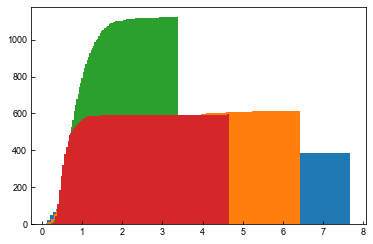

In [45]:
# plot the earthquake moment
# shear velocity

# 2k
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_2k_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_2k_ = np.copy(centers_)
CCDF_2k_ = 1 - (n_  / len(seismi_moment_2k_))

# 4k
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_4k_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_4k_ = np.copy(centers_)
CCDF_4k_ = 1 - (n_  / len(seismi_moment_4k_))


# 20k
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_20k_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_20k_ = np.copy(centers_)
CCDF_20k_ = 1 - (n_  / len(seismi_moment_20k_))

# 80k
n_,bins_, patches_ = plt.hist(np.array(seismi_moment_80k_), cumulative = True, bins = 100)
centers_ = np.zeros(len(n_))
for i_ in range(len(n_)):
    centers_[i_] = (bins_[i_] + bins_[i_ + 1]) / 2   
centers_80k_ = np.copy(centers_)
CCDF_80k_ = 1 - (n_  / len(seismi_moment_80k_))


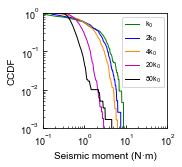

In [46]:
# plot the earthquake moment
# slip velocity
plt.figure(figsize=(2.6,2.4))
plt.rcParams['font.size'] = 9
plt.rc('font', family = 'Arial')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.axes(yscale = "log", xscale = "log",)

plt.plot(centers_20MPa_,  \
         CCDF_20MPa_,\
         linewidth = 1, color = 'g', label = 'k$_{0}$')
plt.plot(centers_2k_,  \
         CCDF_2k_,\
         linewidth = 1, color = 'b', label = '2k$_{0}$')
plt.plot(centers_4k_,  \
         CCDF_4k_,\
         linewidth = 1, color = 'darkorange', label = '4k$_{0}$')
plt.plot(centers_20k_,  \
         CCDF_20k_,\
         linewidth = 1, color = 'm', label = '20k$_{0}$')
plt.plot(centers_80k_,  \
         CCDF_80k_,\
         linewidth = 1, color = 'k', label = '80k$_{0}$')

plt.legend( fontsize = 8)
plt.xlim(10**-1, 10**2)
plt.ylim([10**-3, 10**0])
# plt.yticks([0, 0.5, 1, 1.5, 2, 2.5])
# plt.xticks([0, 0.025, 0.05, 0.075, 0.1])
plt.legend( fontsize = 7)
plt.xlabel('Seismic moment (N·m)', fontsize = 10)
plt.ylabel('CCDF', fontsize = 10)
plt.tight_layout()
plt.savefig('C:/Users/daizh/manuscript_shear_structure_formation_different_conditions/python_file/notebook_plot/statistics_of_seismic_moment_load_stiffness.svg', dpi=600, format='svg')